<a href="https://colab.research.google.com/github/feraldifalah/Python-/blob/main/TUGAS_PYHTON_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [216]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image
from imutils import paths
import numpy as np
import os
import cv2
from keras.layers import Convolution2D,MaxPooling2D

In [217]:
print("[INFO] Loading Images ...")
image_paths = paths.list_images('foto')
data = []
labels = []

for image_path in image_paths :
  image = Image.open(image_path)
  image = np.array(image.resize((128,128))) / 255.0
  data.append(image)
  
  label = image_path.split(os.path.sep)[-2]
  labels.append(label)

[INFO] Loading Images ...


In [218]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.3, shuffle=True)

In [221]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [222]:
print("[INFO] training network ...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network ...
Epoch 1/100
13/13 [==============================] - 1s 106ms/step - loss: 1.6163 - accuracy: 0.1936 - val_loss: 1.6066 - val_accuracy: 0.1875
Epoch 2/100
13/13 [==============================] - 1s 92ms/step - loss: 1.6065 - accuracy: 0.2181 - val_loss: 1.5979 - val_accuracy: 0.3409
Epoch 3/100
13/13 [==============================] - 1s 94ms/step - loss: 1.5853 - accuracy: 0.2868 - val_loss: 1.5469 - val_accuracy: 0.3409
Epoch 4/100
13/13 [==============================] - 1s 93ms/step - loss: 1.5071 - accuracy: 0.3627 - val_loss: 1.4032 - val_accuracy: 0.3807
Epoch 5/100
13/13 [==============================] - 1s 93ms/step - loss: 1.4154 - accuracy: 0.3725 - val_loss: 1.3160 - val_accuracy: 0.4489
Epoch 6/100
13/13 [==============================] - 1s 93ms/step - loss: 1.3203 - accuracy: 0.3971 - val_loss: 1.2755 - val_accuracy: 0.4318
Epoch 7/100
13/13 [==============================] - 1s 96ms/step - loss: 1.3485 - accuracy: 0.3971 - val_loss: 1.2634 

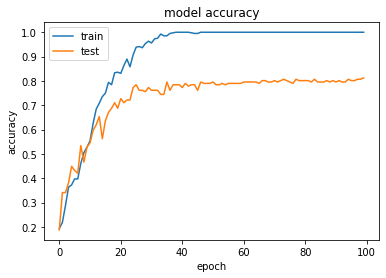

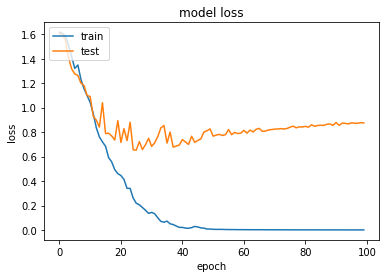

In [223]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [224]:
print("[INFO] evaluating network ...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network ...
              precision    recall  f1-score   support

      GMB_01       0.76      0.83      0.79        30
      GMB_02       0.85      0.78      0.82        37
      GMB_03       0.90      0.82      0.86        33
      GMB_04       0.71      0.78      0.74        37
      GMB_05       0.87      0.85      0.86        39

    accuracy                           0.81       176
   macro avg       0.82      0.81      0.81       176
weighted avg       0.82      0.81      0.81       176

